In [ ]:
install.packages('tidyverse')
suppressMessages(library(tidyverse)) 
install.packages('funModeling')       # data manipulation and plots
suppressMessages(library(funModeling))      # overview stats
install.packages('magrittr') 
library(magrittr)               # to use pipes
install.packages('skimr') 
library(skimr)                  # to get a quick summary table
install.packages('caret') 
library(caret)                  # to create the partition for training/test datasets
install.packages('cowplot') 
library(cowplot)                 

options(scipen = 999)                              # turn off scientific notation for numbers
options(repr.plot.width=12, repr.plot.height=8)    # set universal plot size

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘gtools’, ‘caTools’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’, ‘viridis’, ‘gplots’, ‘plyr’, ‘Hmisc’, ‘ROCR’, ‘gridExtra’, ‘pander’, ‘reshape2’, ‘lazyeval’, ‘moments’, ‘entropy’


Warning message in install.packages("funModeling"):
“installation of package ‘Hmisc’ had non-zero exit status”
Warning message in install.packages("funModeling"):
“installation of package ‘funModeling’ had non-zero exit status”


ERROR: ignored

In [ ]:
df <- read_csv('/content/insurance.csv')

# denote factor variables
df$sex <- factor(df$sex)
df$smoker <- factor(df$smoker)
df$region <- factor(df$region)
df$children <- factor(df$children)


── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  charges = col_double()
)




In [ ]:
df %>%
    is.na() %>%
    sum()

[1] 0

In [ ]:
df %>%
    str()   

spec_tbl_df[,7] [1,338 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age     : num [1:1338] 19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num [1:1338] 27.9 33.8 33 22.7 28.9 ...
 $ children: Factor w/ 6 levels "0","1","2","3",..: 1 2 4 1 1 1 2 4 3 1 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num [1:1338] 16885 1726 4449 21984 3867 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_character(),
  ..   bmi = col_double(),
  ..   children = col_double(),
  ..   smoker = col_character(),
  ..   region = col_character(),
  ..   charges = col_double()
  .. )


In [ ]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             1338  
Number of columns          7     
_______________________          
Column type frequency:           
  factor                   4     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 sex                   0             1 FALSE          2
2 children              0             1 FALSE          6
3 smoker                0             1 FALSE          2
4 region                0             1 FALSE          4
  top_counts                            
1 mal: 676, fem: 662                    
2 0: 574, 1: 324, 2: 240, 3: 157        
3 no: 1064, yes: 274                    
4 sou: 364, nor: 325, sou: 325, nor: 324

── Variable type: numeric ────────────────────

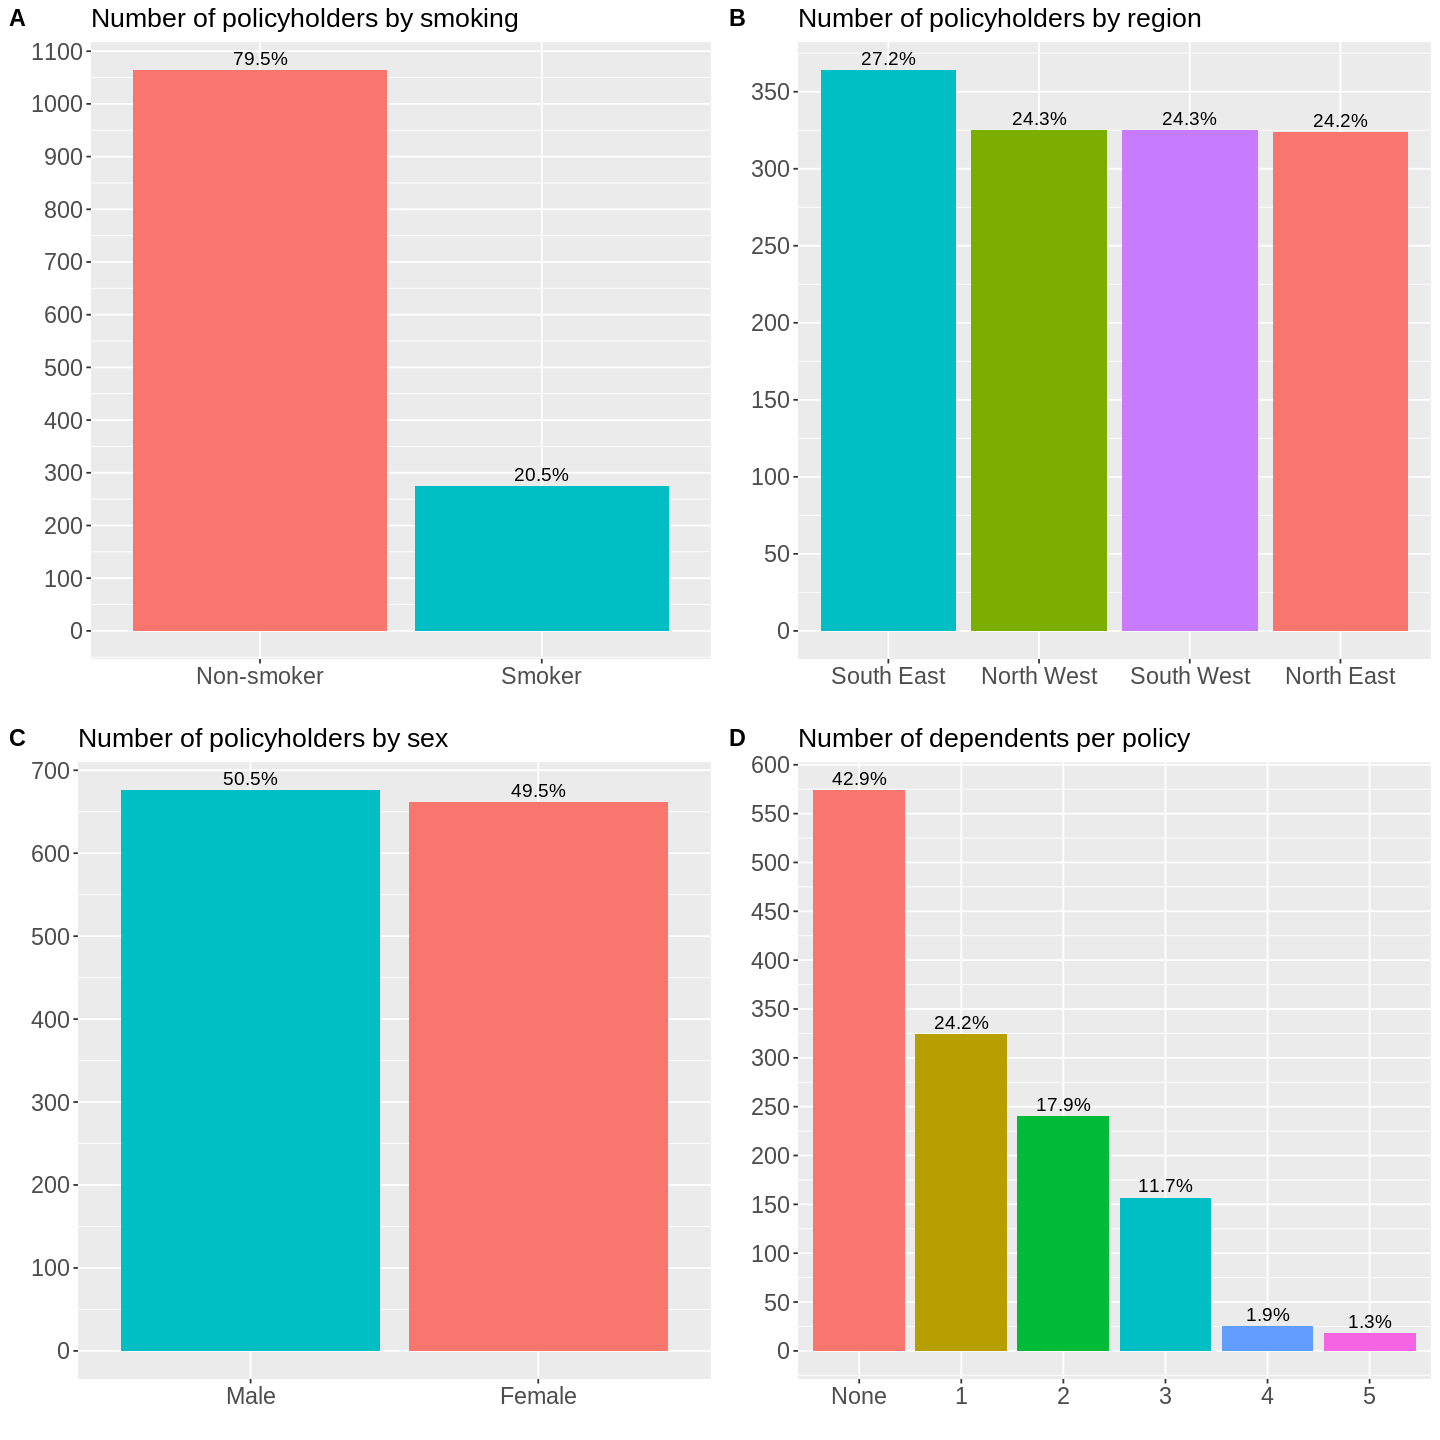

In [ ]:
figsize <- options(repr.plot.width=12, repr.plot.height=12) # set plot size for this plot 

# Smoker count plot
smoker <- df %>%
    ggplot(aes(x=smoker, fill=smoker)) +
    geom_bar(show.legend = FALSE) +
    # add percentages on top of bars
    geom_text(
        stat='count',
        aes(label=paste0(round(after_stat(prop*100), digits=1), "%"),group=1),
        vjust=-0.4,
        size=4
    ) +
    # add labels
    labs(
        x = "",
        y = "",
        title = "Number of policyholders by smoking"
    ) +
    # rename x-ticks
    scale_x_discrete(
        labels = c("no" = "Non-smoker", "yes" = "Smoker")
    ) +
    # adjust y-ticks
    scale_y_continuous(
        breaks=seq(0,2000,100)
    ) +
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14)
    )

# Region count plot
region <- df %>%
    ggplot(aes(x=forcats::fct_infreq(region), fill=region)) +
    geom_bar(show.legend = FALSE) +
    # add percentages on top of bars
    geom_text(
        stat='count',
        aes(label = paste0(round(after_stat(prop*100), digits=1), "%"), group=1),
        vjust=-0.4,
        size=4
    ) +
    # add labels
    labs(
        x = "",
        y = "",
        title = "Number of policyholders by region"
    ) +
    # rename x-ticks
    scale_x_discrete(
        labels = c("northeast" = "North East", "northwest" = "North West",
                   "southeast" = "South East", "southwest" = "South West")
    ) +
    # adjust ticks
    scale_y_continuous(
        breaks=seq(0,350,50)
    ) +
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14)
    )

# Sex count plot
sex <- df %>%
    ggplot(aes(x=forcats::fct_infreq(sex), fill=sex)) +
    geom_bar(show.legend = FALSE) +
    # add percentages on top of bars
    geom_text(
        stat='count',
        aes(
            label=paste0(round(after_stat(prop*100), digits=1), "%"), group=1),
        vjust=-0.4,
        size=4
    ) +
    # add labels
    labs(
        x = "",
        y = "",
        title = "Number of policyholders by sex",
        fill = "Sex"
    ) +
    # rename x-ticks
    scale_x_discrete(
        labels = c("male" = "Male", "female" = "Female")
    ) +
    # adjust y-ticks
    scale_y_continuous(
        breaks=seq(0,700,100)
    ) +
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14)
    )

# Children count plot
children <- df %>%
    ggplot(aes(x=forcats::fct_infreq(children), fill=children)) +
    geom_bar(show.legend = FALSE) +
    # add percentages
    geom_text(
        stat='count',
        aes(label=paste0(round(after_stat(prop*100), digits=1), "%"), group=1),
        vjust=-0.4,
        size=4
    ) +
    # add labels
    labs(
        x = "",
        y = "",
        title = "Number of dependents per policy"
    ) +
    # rename x-ticks
    scale_x_discrete(
        labels = c("0" = "None")
    ) +
    # adjust y-ticks
    scale_y_continuous(
        breaks=seq(0,600,50)
    ) +
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14)
    )

# Plot grid
cowplot::plot_grid(
  smoker, region, sex, children,
  labels="AUTO",
  ncol = 2,
  nrow = 2
    )

options(figsize)

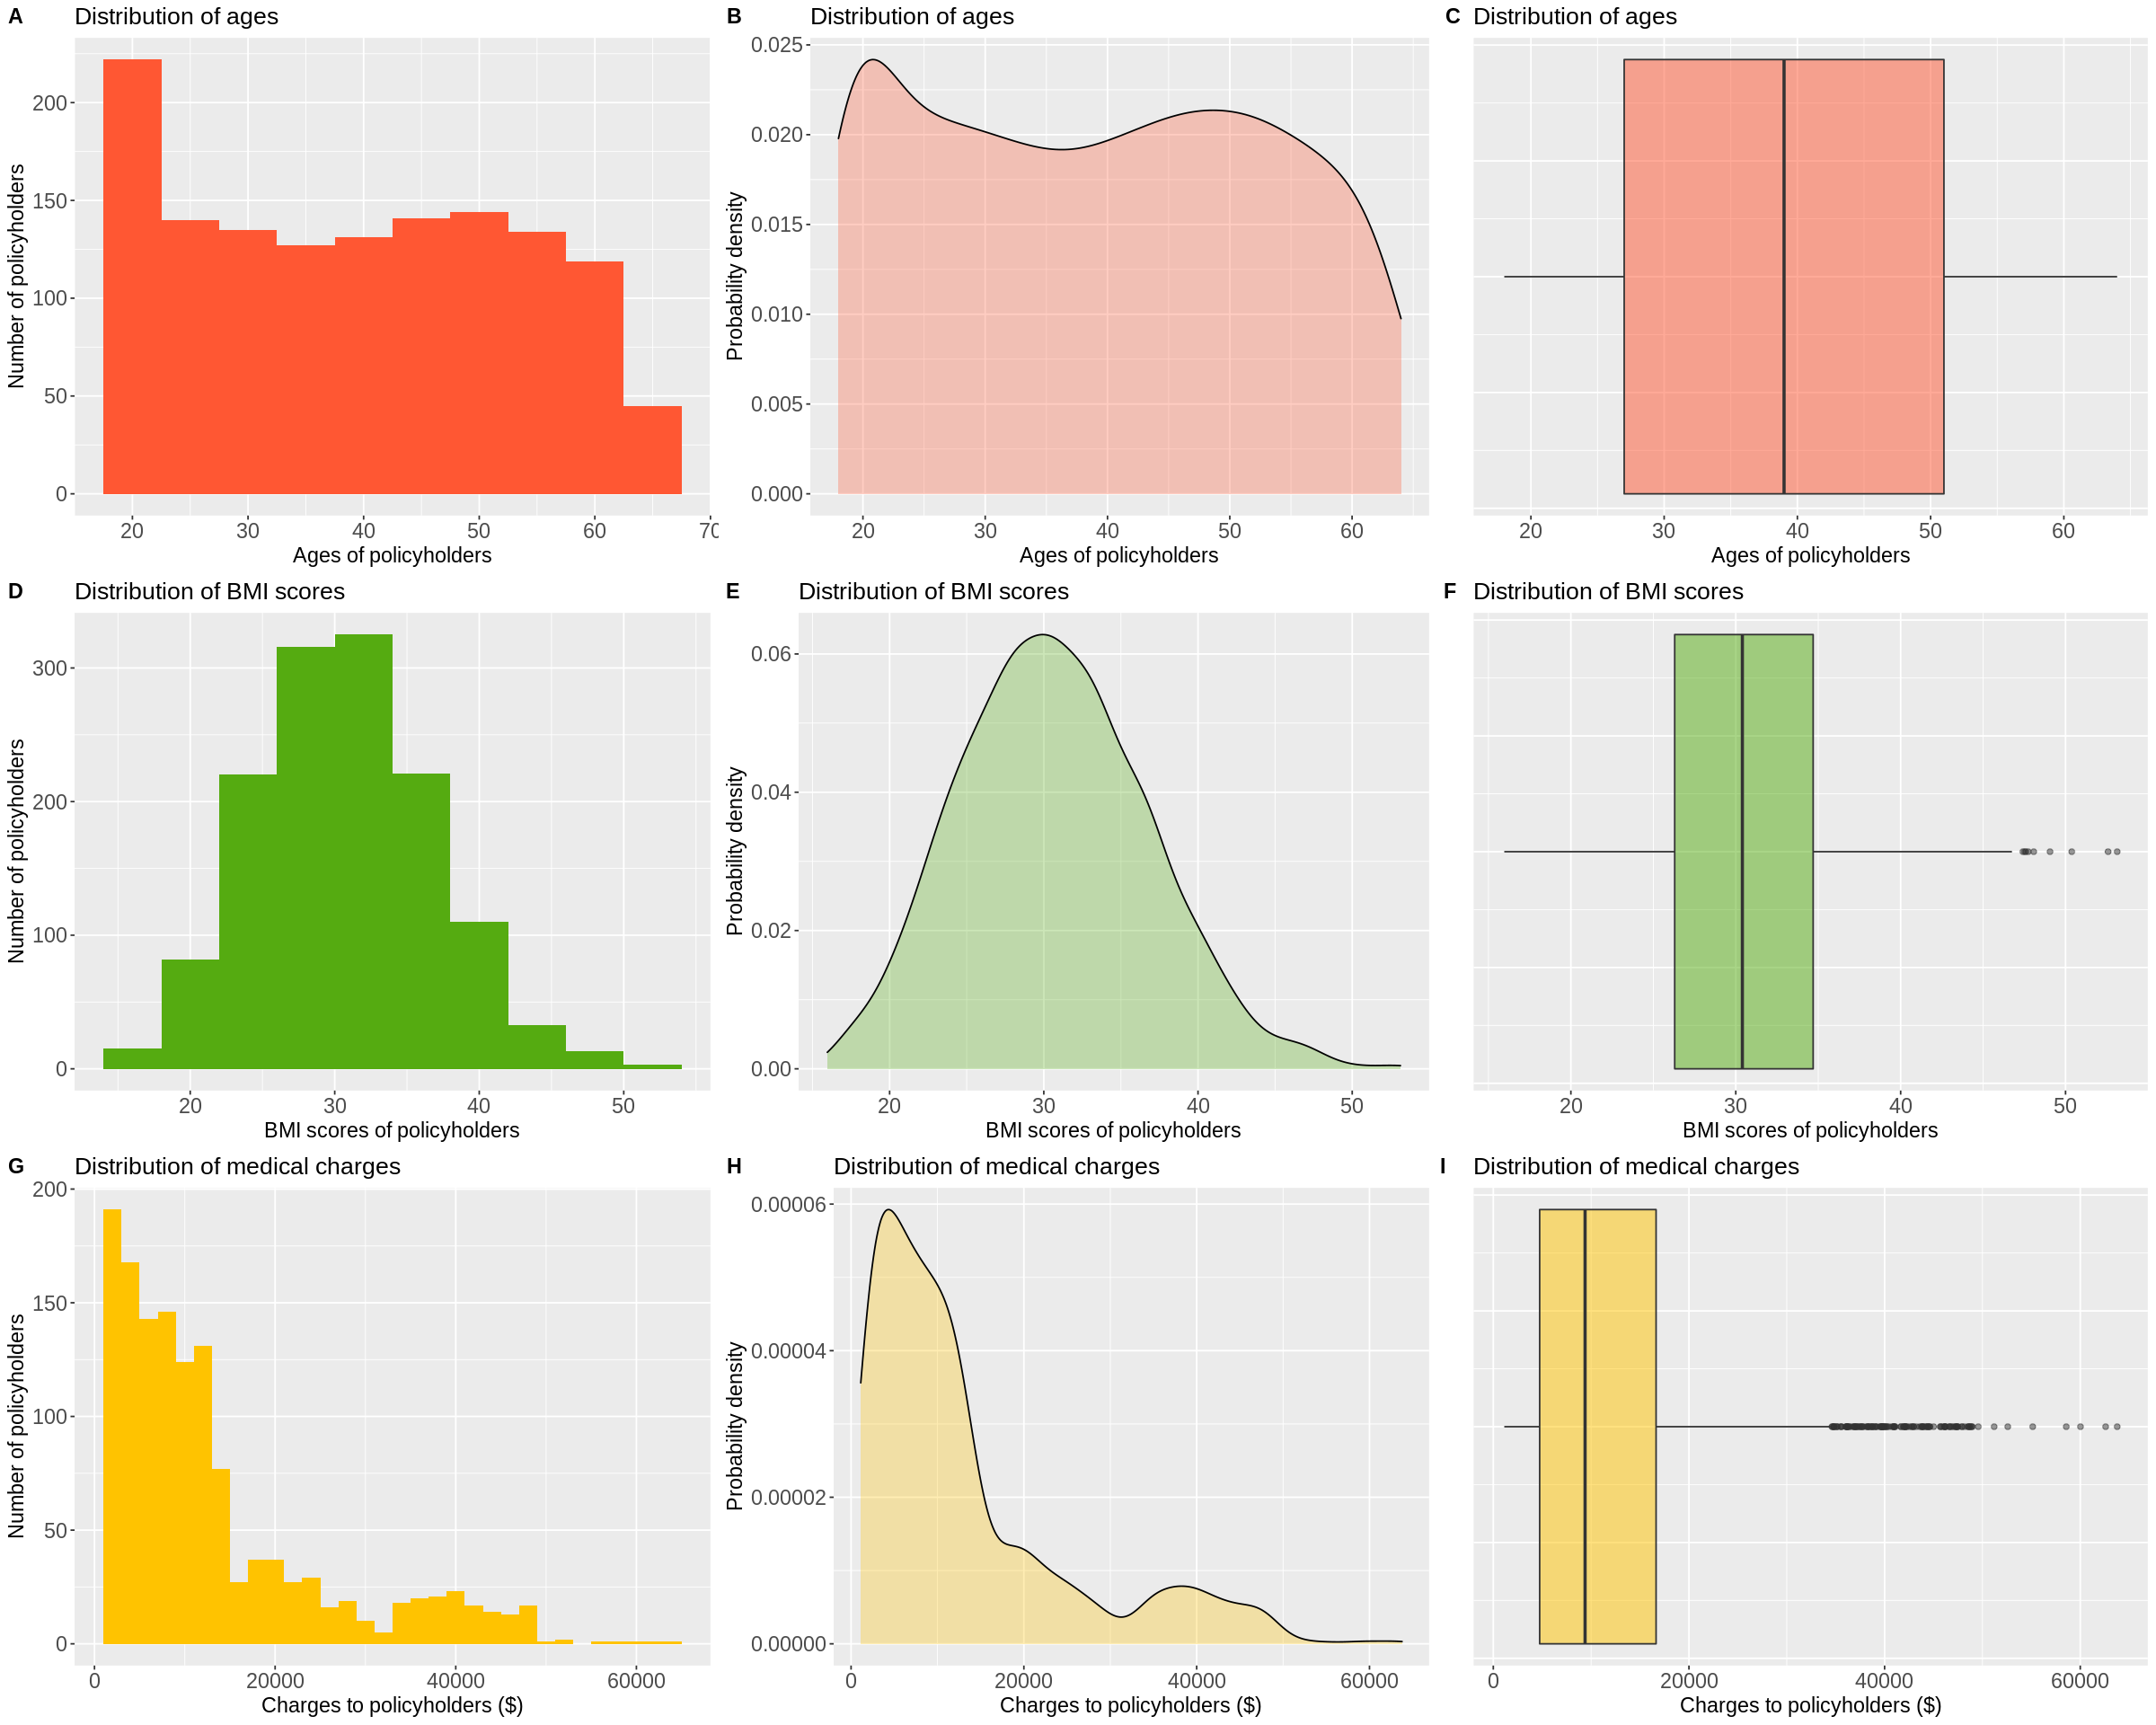

In [ ]:
figsize <- options(repr.plot.width=20, repr.plot.height=16)

# Age distribution
age_hist <- df %>%
    ggplot(aes(x=age))+
    geom_histogram(
        binwidth = 5,
        show.legend = FALSE,
        fill="#ff5733"
    )+
    labs(
        x = "Ages of policyholders",
        y = "Number of policyholders",
        title = "Distribution of ages"
    )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

age_dens <- df %>%
    ggplot(aes(x=age)) +
     geom_density(
        alpha=.3,
        fill="#ff5733"
    )+
    labs(
        x = "Ages of policyholders",
        y = "Probability density",
        title = "Distribution of ages"
    )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

age_box <- df %>%
    ggplot(aes(y=age)) +
    geom_boxplot(
        alpha=.5,
        fill="#ff5733"
    )+
    coord_flip() +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )+
    labs(
        y = "Ages of policyholders",
        x = "",
        title = "Distribution of ages"
    )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

# BMI distribution
bmi_hist <- df %>%
    ggplot(aes(x=bmi))+
    geom_histogram(
        binwidth = 4,
        show.legend = FALSE,
        fill = "#55ab11"
    )+
    labs(
        x = "BMI scores of policyholders",
        y = "Number of policyholders",
        title = "Distribution of BMI scores"
    )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

bmi_dens <- df %>%
    ggplot(aes(x=bmi)) +
     geom_density(
        alpha=.3,
        fill="#55ab11"
    )+
    labs(
        x = "BMI scores of policyholders",
        y = "Probability density",
        title = "Distribution of BMI scores"
    )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

bmi_box <- df %>%
    ggplot(aes(y=bmi)) +
    geom_boxplot(
        alpha=.5,
        fill="#55ab11"
    )+
    coord_flip() +
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )+
    labs(
        y = "BMI scores of policyholders",
        x = "",
        title = "Distribution of BMI scores"
    )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

# Charges distribution
charges_hist <- df %>%
    ggplot(aes(x=charges)) +
    geom_histogram(
        binwidth = 2000,
        show.legend = FALSE,
        fill = "#FFC300"
    )+
    labs(
        x = "Charges to policyholders ($)",
        y = "Number of policyholders",
        title = "Distribution of medical charges"
    )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

charges_dens <- df %>%
    ggplot(
        aes(x=charges)
    ) +
     geom_density(
        alpha=.3,
        fill="#FFC300"
    ) +
    labs(
        x = "Charges to policyholders ($)",
        y = "Probability density",
        title = "Distribution of medical charges"
    ) +
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

charges_box <- df %>%
    ggplot(aes(y=charges))+
    geom_boxplot(
        alpha=.5,
        fill="#FFC300"
    )+
    coord_flip()+
    # remove ticks from y-axis
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )+
    labs(
        y = "Charges to policyholders ($)",
        x = "",
        title = "Distribution of medical charges"
    )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

cowplot::plot_grid(
    age_hist, age_dens, age_box,
    bmi_hist, bmi_dens, bmi_box,
    charges_hist, charges_dens, charges_box,
    labels="AUTO",
    ncol = 3,
    nrow = 3
    )

options(figsize)

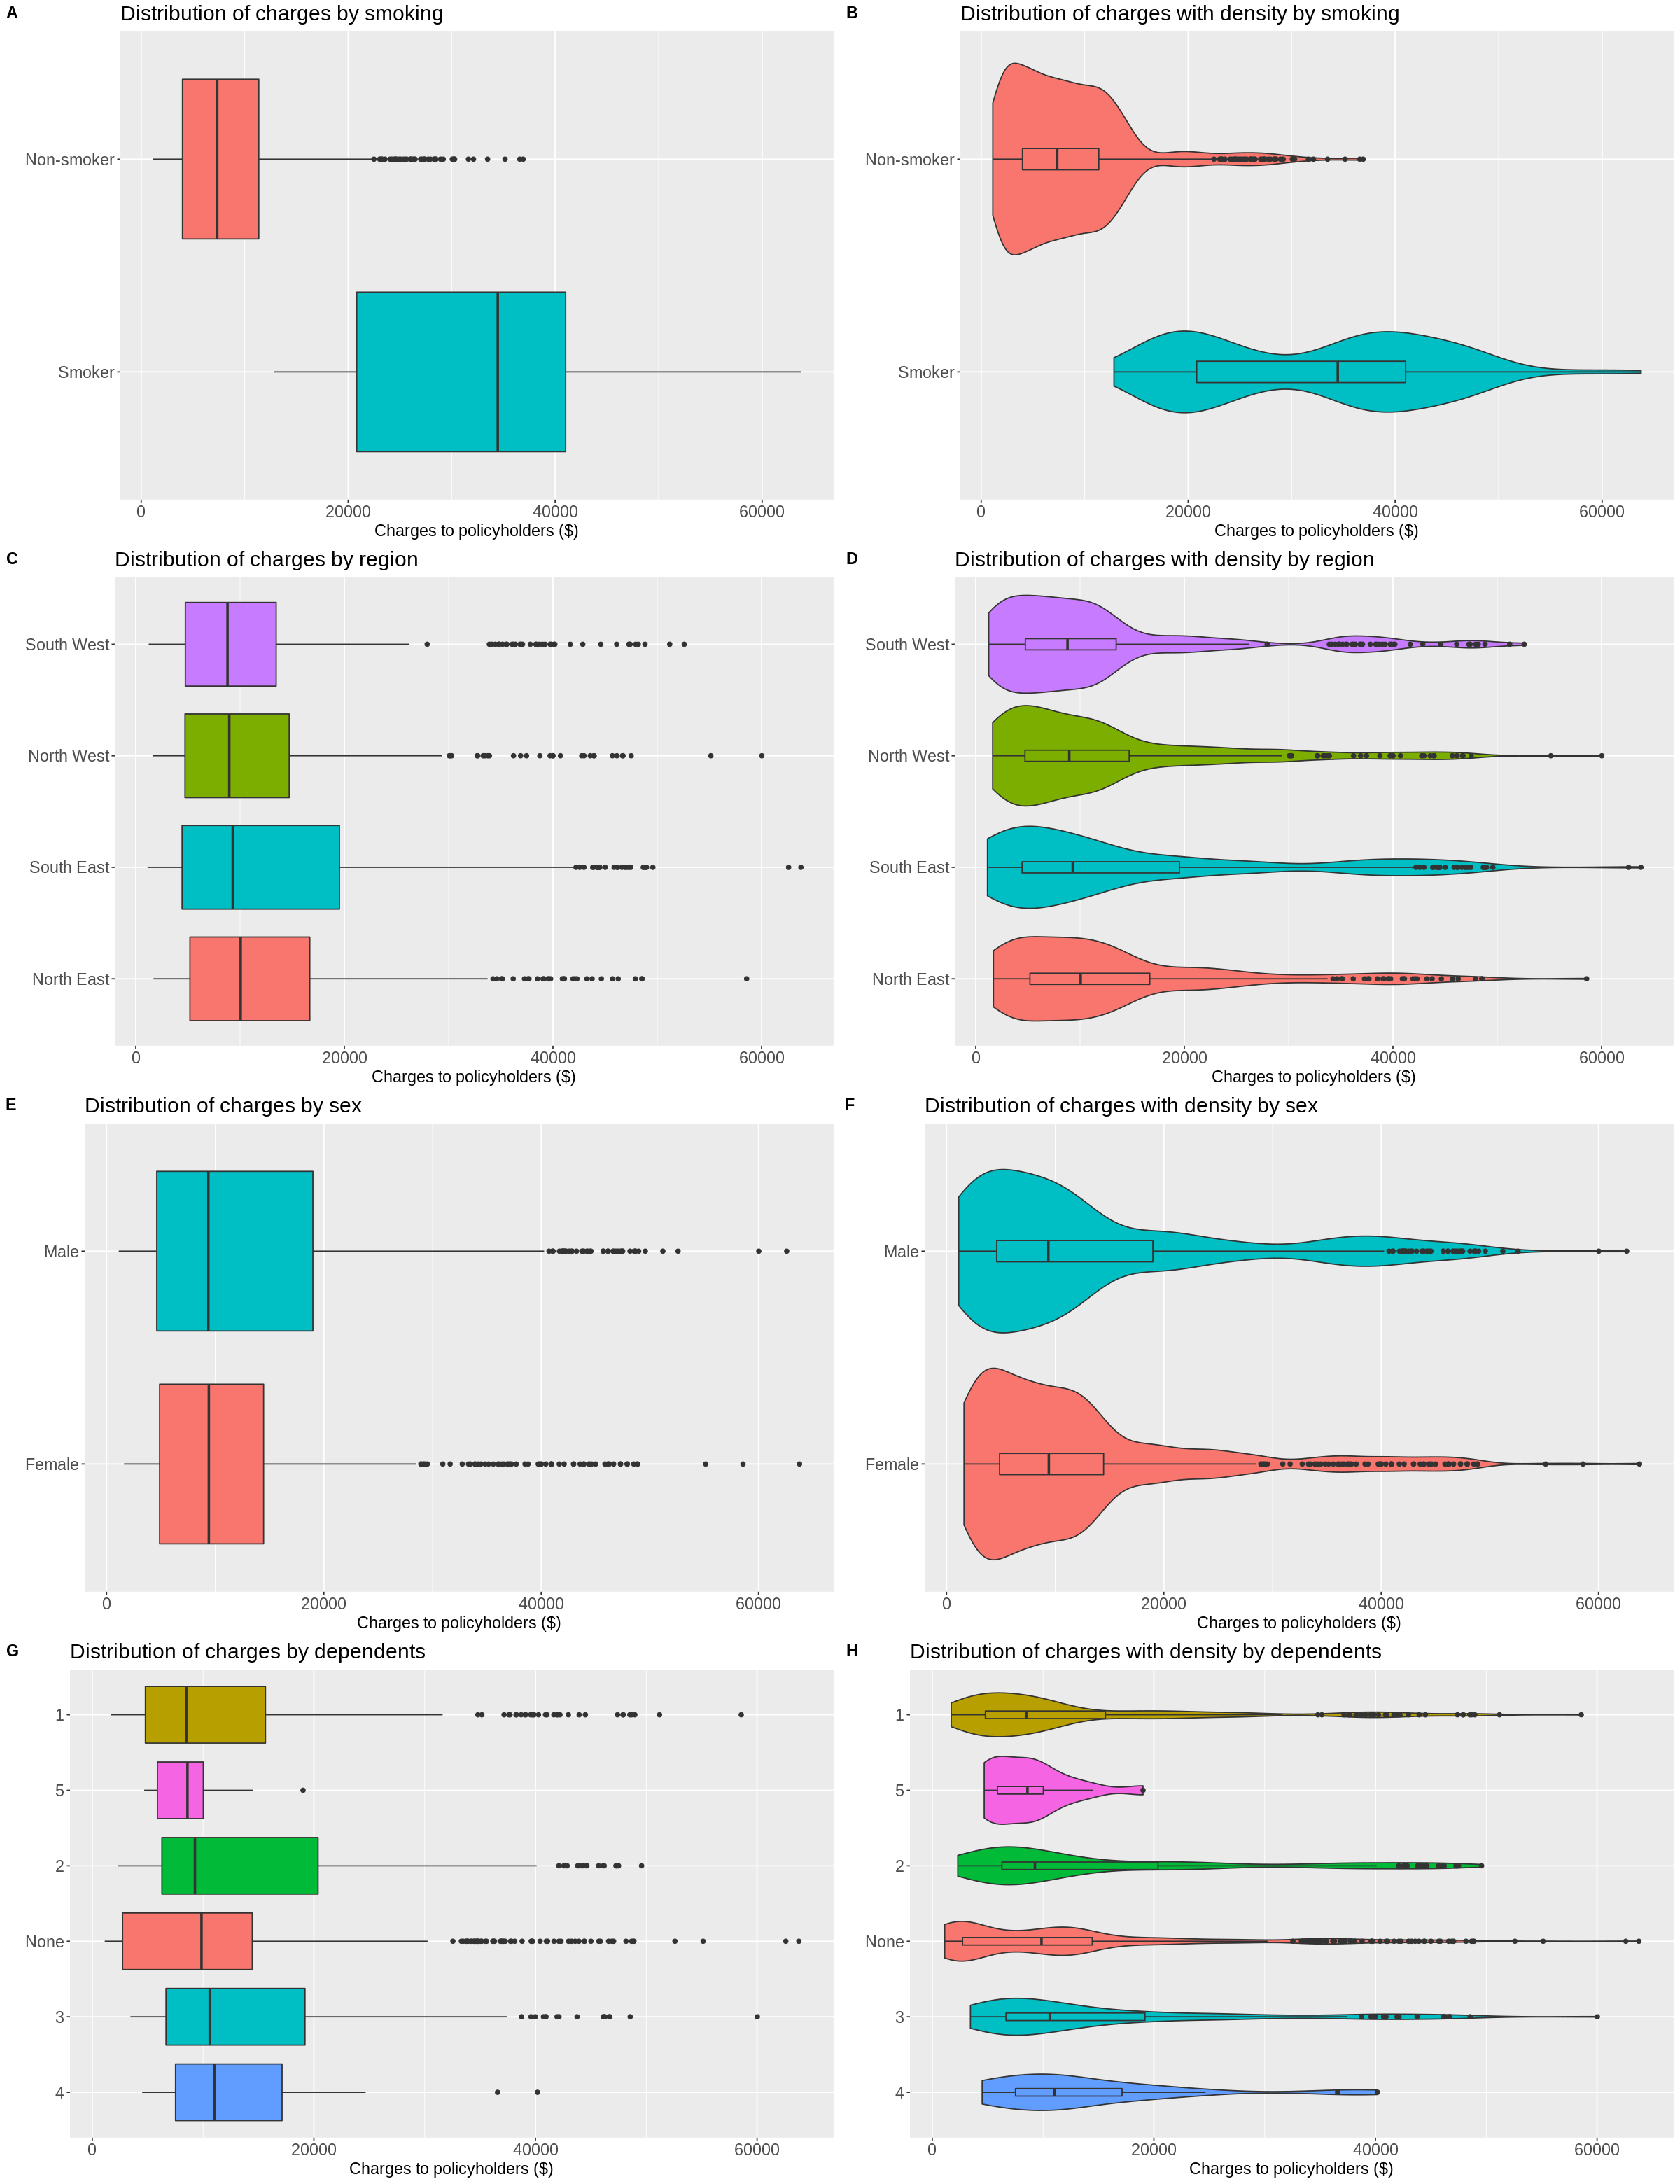

In [ ]:
figsize <- options(repr.plot.width=20, repr.plot.height=26)

# Boxplots
chargesBysmoker <- df %>%
    ggplot(
        aes(
            x=forcats::fct_reorder(smoker, charges, .fun=median, .desc=TRUE),
            y=charges,
            fill=smoker    
            )              
        ) +
    geom_boxplot(show.legend = FALSE) +
    coord_flip() +
    labs(
        x = "",
        y = "Charges to policyholders ($)",
        title = "Distribution of charges by smoking"
    )+
    scale_x_discrete(
        labels = c("no" = "Non-smoker", "yes" = "Smoker")
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )
    
chargesByregion <- df %>%
    ggplot(
        aes(
            x=forcats::fct_reorder(region, charges, .fun=median, .desc=TRUE),
            y=charges,
            fill=region
            )
        ) +
    geom_boxplot(show.legend = FALSE) +
    coord_flip() +
    labs(
        x = "",
        y = "Charges to policyholders ($)",
        title = "Distribution of charges by region"
    )+
    scale_x_discrete(
        labels = c("northeast" = "North East", "northwest" = "North West",
                    "southeast" = "South East", "southwest" = "South West")
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

chargesBychildren <- df %>%
    ggplot(
        aes(
            x=forcats::fct_reorder(children, charges, .fun=median, .desc=TRUE),
            y=charges,
            fill=children
            )
        ) +
    geom_boxplot(show.legend = FALSE) +
    coord_flip() +
    labs(
        x = "",
        y = "Charges to policyholders ($)",
        title = "Distribution of charges by dependents"
    )+
    scale_x_discrete(
        labels = c("0" = "None")
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

chargesBysex <- df %>%
    ggplot(
    aes(
        x=forcats::fct_reorder(sex, charges, .fun=median, .desc=TRUE),
        y=charges,
        fill=sex
        )
    ) +
    geom_boxplot(show.legend = FALSE) +
    coord_flip() +
    labs(
        x = "",
        y = "Charges to policyholders ($)",
        title = "Distribution of charges by sex"
    )+
    scale_x_discrete(
        labels = c("male" = "Male", "female" = "Female")
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

# Density plots with medians
densityBySmoker <- df %>%
    ggplot(
        aes(
            x=forcats::fct_reorder(smoker, charges, .fun=median, .desc=TRUE),
            y=charges,
            fill=smoker
            )
        ) +
    geom_violin(show.legend = FALSE) +
    geom_boxplot(
        width=0.1,
        show.legend = FALSE
    )+
    coord_flip() +
    labs(
        x = "",
        y = "Charges to policyholders ($)",
        title = "Distribution of charges with density by smoking"
    )+
    scale_x_discrete(
        labels = c("no" = "Non-smoker", "yes" = "Smoker")
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

densityByRegion <- df %>%
    ggplot(
        aes(
            x=forcats::fct_reorder(region, charges, .fun=median, .desc=TRUE),
            y=charges,
            fill=region
            )
        ) +
    geom_violin(show.legend = FALSE) +
    geom_boxplot(
        width=0.1,
        show.legend = FALSE
    )+    coord_flip() +
    labs(
        x = "",
        y = "Charges to policyholders ($)",
        title = "Distribution of charges with density by region"
    )+
    scale_x_discrete(labels = c("northeast" = "North East", "northwest" = "North West",
                                "southeast" = "South East", "southwest" = "South West")
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

densityBySex <- df %>%
    ggplot(
    aes(
        x=forcats::fct_reorder(sex, charges, .fun=median, .desc=TRUE),
        y=charges,
        fill=sex
        )
    ) +
    geom_violin(show.legend = FALSE) +
    geom_boxplot(
        width=0.1,
        show.legend = FALSE
    )+    coord_flip() +
    labs(
        x = "",
        y = "Charges to policyholders ($)",
        title = "Distribution of charges with density by sex"
    )+
    scale_x_discrete(
        labels = c("male" = "Male", "female" = "Female")
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

densityByChildren <- df %>%
    ggplot(
        aes(
            x=forcats::fct_reorder(children, charges, .fun=median, .desc=TRUE),
            y=charges,
            fill=children
            )
        ) +
    geom_violin(show.legend = FALSE) +
    geom_boxplot(
        width=0.1,
        show.legend = FALSE
    )+    coord_flip() +
    labs(
        x = "",
        y = "Charges to policyholders ($)",
        title = "Distribution of charges with density by dependents"
    )+
    scale_x_discrete(
        labels = c("0" = "None")
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

# Plot grid of all plots
cowplot::plot_grid(
    chargesBysmoker, densityBySmoker,
    chargesByregion, densityByRegion,
    chargesBysex, densityBySex,
    chargesBychildren, densityByChildren,
    labels="AUTO",
    ncol = 2,
    nrow = 4
)

options(figsize)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



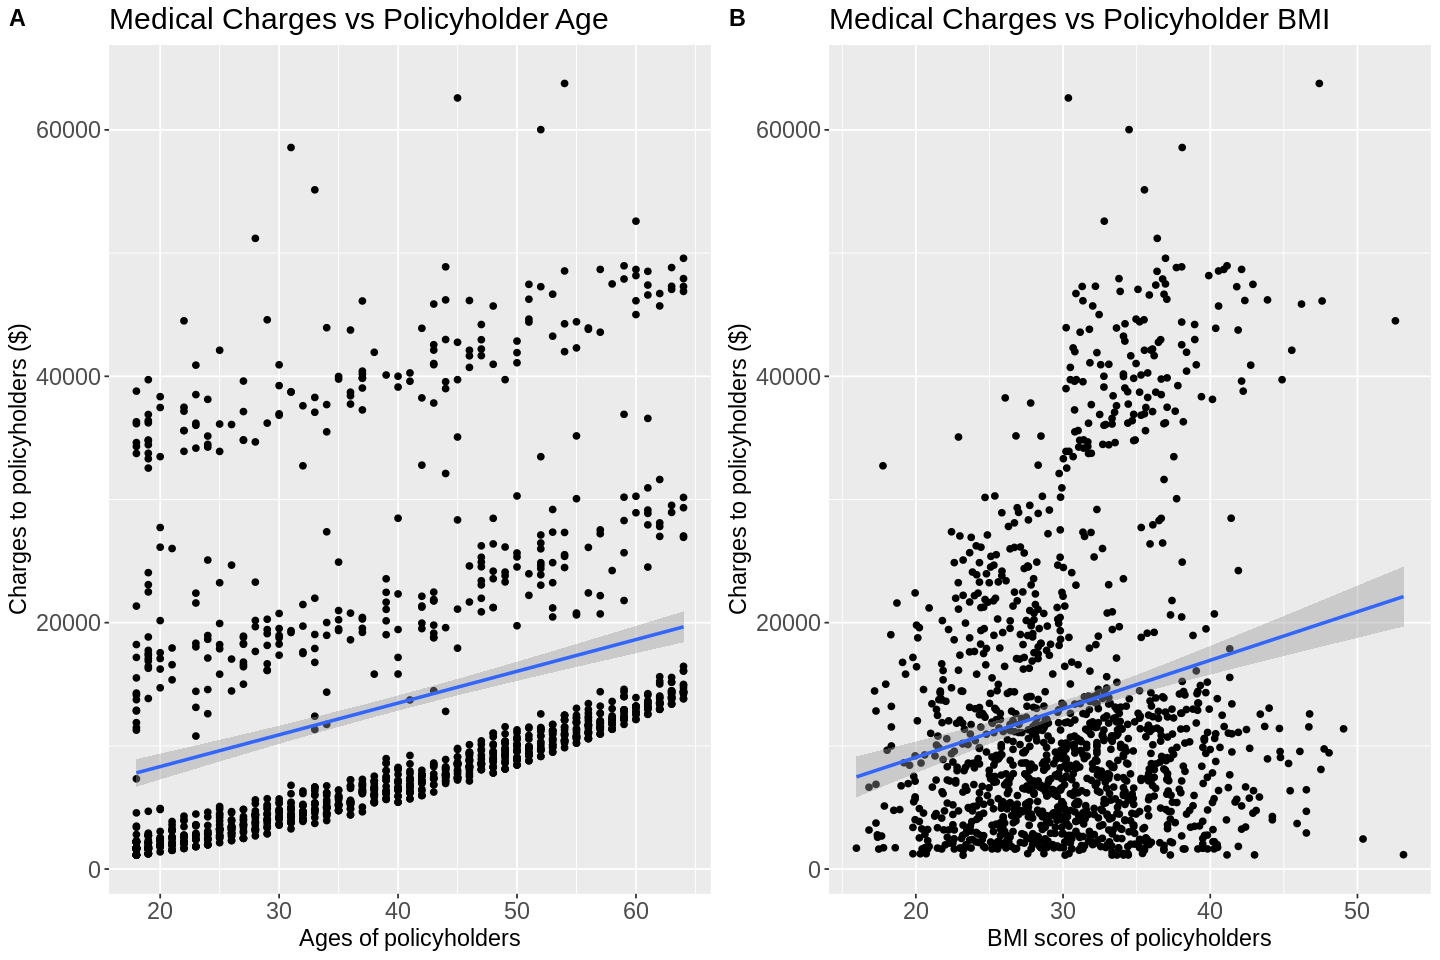

In [ ]:
figsize <- options(repr.plot.width=12, repr.plot.height=8)

age_scatter <- df %>%
    ggplot(aes(x=age, y=charges)) +
    geom_point()+
    # add a linear regression line
    geom_smooth(method='lm')+
    labs(
        x = "Ages of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder Age"
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

bmi_scatter <- df %>%
    ggplot(aes(x=bmi, y=charges)) +
    geom_point()+
    # add a linear regression line
    geom_smooth(method='lm')+
    labs(
        x = "BMI scores of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder BMI"
    )+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

cowplot::plot_grid(
  age_scatter, bmi_scatter,
  labels="AUTO",
  ncol = 2,
  nrow = 1
    )

options(figsize)

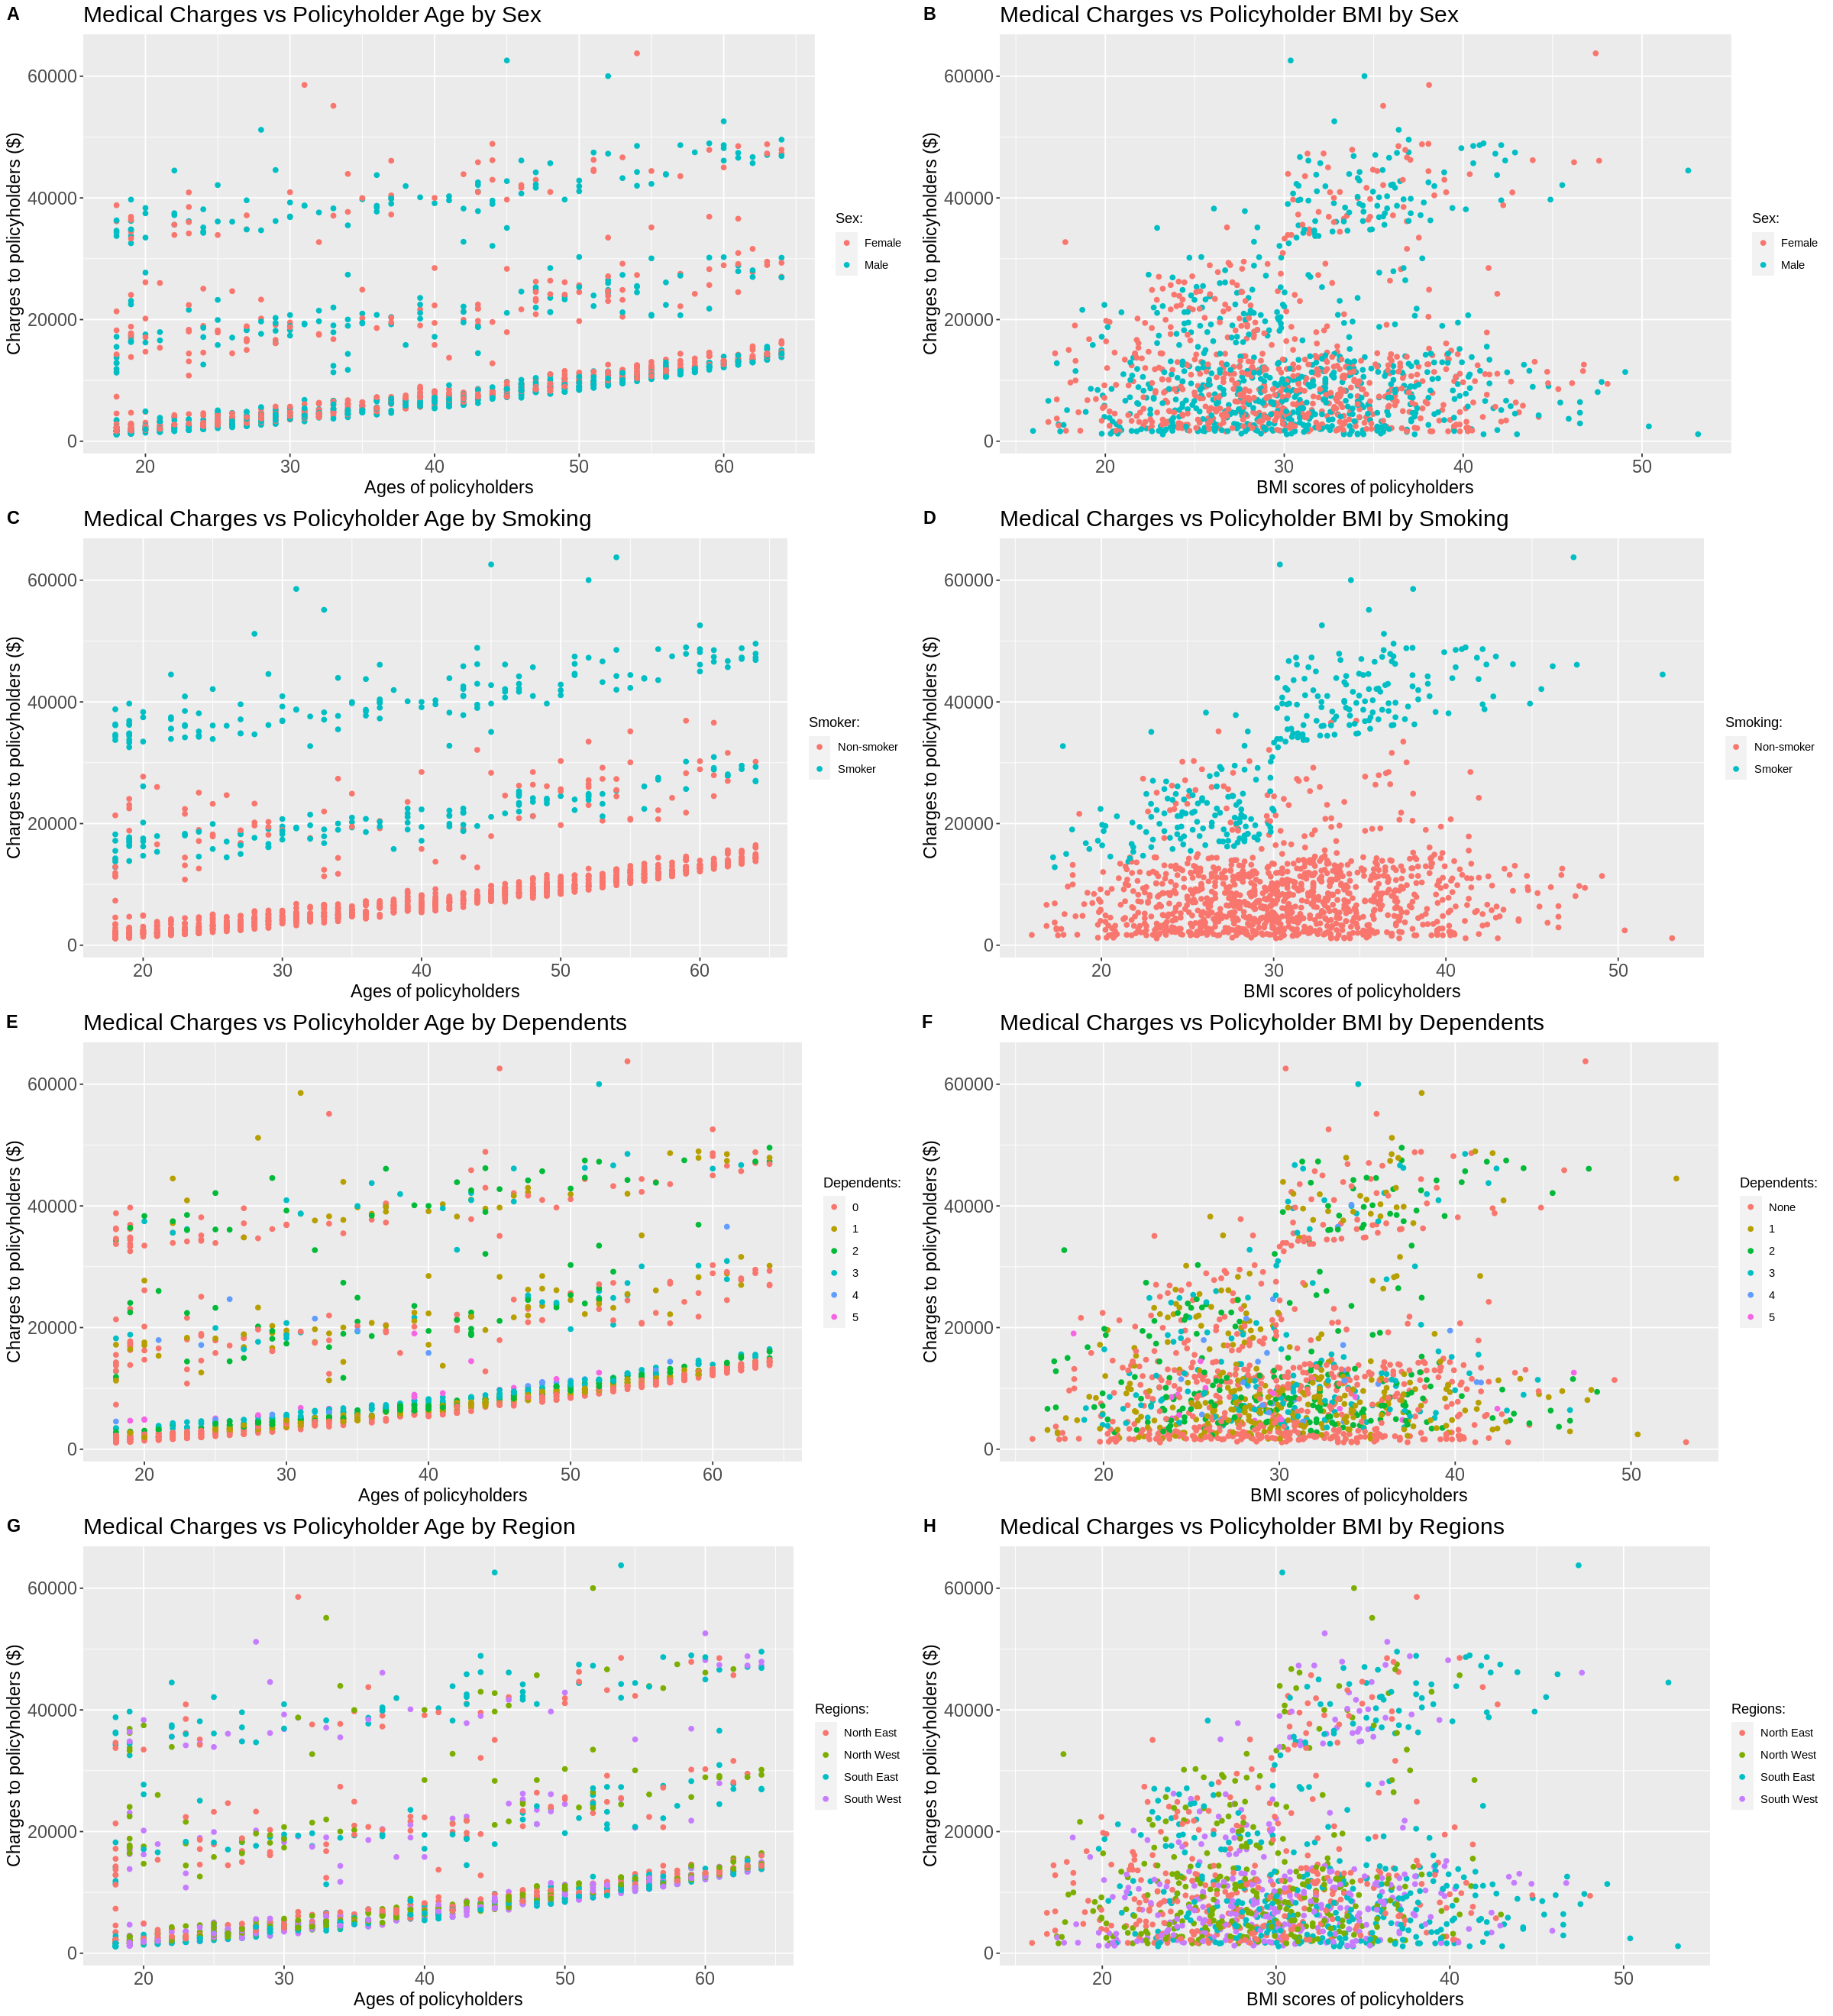

In [ ]:
figsize <- options(repr.plot.width=20, repr.plot.height=22)

# by sex
age_scatter_sex <- df %>%
    ggplot(aes(x=age, y=charges, color=sex)) +
    geom_point()+
    labs(
        x = "Ages of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder Age by Sex",
        color = "Sex:"
    )+
    scale_color_hue(labels = c("male" = "Male", "female" = "Female"))+
    guides(fill=FALSE)+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

bmi_scatter_sex <- df %>%
    ggplot(aes(x=bmi, y=charges, color=sex)) +
    geom_point()+
    labs(
        x = "BMI scores of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder BMI by Sex",
        color = "Sex:"
    )+
    scale_color_hue(labels = c("male" = "Male", "female" = "Female"))+
    guides(fill=FALSE)+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

#by smoker
age_scatter_smoker <- df %>%
    ggplot(aes(x=age, y=charges, color=smoker)) +
    geom_point()+
    labs(
        x = "Ages of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder Age by Smoking",
        color = "Smoker:"
    )+
    scale_color_hue(labels = c("no" = "Non-smoker", "yes" = "Smoker"))+
    guides(fill=FALSE)+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

bmi_scatter_smoker <- df %>%
    ggplot(aes(x=bmi, y=charges, color=smoker)) +
    geom_point()+
    labs(
        x = "BMI scores of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder BMI by Smoking",
        color = "Smoking:"
    )+
    scale_color_hue(labels = c("no" = "Non-smoker", "yes" = "Smoker"))+
    guides(fill=FALSE)+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

#by children
age_scatter_kids <- df %>%
    ggplot(aes(x=age, y=charges, color=children)) +
    geom_point()+
    labs(
        x = "Ages of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder Age by Dependents",
        color = "Dependents:"
    )+
    scale_color_hue(labels = c("no" = "Non-smoker", "yes" = "Smoker"))+
    guides(fill=FALSE)+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

bmi_scatter_kids <- df %>%
    ggplot(aes(x=bmi, y=charges, color=children)) +
    geom_point()+
    labs(
        x = "BMI scores of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder BMI by Dependents",
        color = "Dependents:"
    )+
    scale_color_hue(labels = c("0" = "None"))+
    guides(fill=FALSE)+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

#by region
age_scatter_region <- df %>%
    ggplot(aes(x=age, y=charges, color=region)) +
    geom_point()+
    labs(
        x = "Ages of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder Age by Region",
        color = "Regions:"
    )+
    scale_color_hue(labels = c("northeast" = "North East", "northwest" = "North West",
                                "southeast" = "South East", "southwest" = "South West"))+
    guides(fill=FALSE)+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

bmi_scatter_region <- df %>%
    ggplot(aes(x=bmi, y=charges, color=region)) +
    geom_point()+
    labs(
        x = "BMI scores of policyholders",
        y = "Charges to policyholders ($)",
        title = "Medical Charges vs Policyholder BMI by Regions",
        color = "Regions:"
    )+
    scale_color_hue(labels = c("northeast" = "North East", "northwest" = "North West",
                                "southeast" = "South East", "southwest" = "South West"))+
    guides(fill=FALSE)+
    # resize text
    theme(
        plot.title = element_text(size=18),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

# make a grid
cowplot::plot_grid(
    age_scatter_sex, bmi_scatter_sex,
    age_scatter_smoker, bmi_scatter_smoker,
    age_scatter_kids, bmi_scatter_kids,
    age_scatter_region, bmi_scatter_region,
    labels="AUTO",
    ncol = 2,
    nrow = 4
    )

options(figsize)

In [ ]:
df %>%
    group_by(smoker) %>%
      summarise(
        count = n(),
        min = min(charges),
        median = median(charges),
        max = max(charges),
        IQR = IQR(charges)
      ) %>%
    arrange(desc(median)) # sort by median in descending order

smoker,count,min,median,max,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
yes,274,12829.455,34456.348,63770.43,20192.963
no,1064,1121.874,7345.405,36910.61,7376.448


In [ ]:
wilcox.test(df$charges ~ df$smoker)   


	Wilcoxon rank sum test with continuity correction

data:  df$charges by df$smoker
W = 7403, p-value < 0.00000000000000022
alternative hypothesis: true location shift is not equal to 0


In [ ]:
df %>%
    group_by(region) %>%
      summarise(
        count = n(),
        min = min(charges),
        median = median(charges),
        max = max(charges),
        IQR = IQR(charges)
      ) %>%
    arrange(desc(median)) # sort by median in descending order

region,count,min,median,max,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
northeast,324,1694.796,10057.652,58571.07,11493.042
southeast,364,1121.874,9294.132,63770.43,15085.401
northwest,325,1621.340,8965.796,60021.40,9992.007
southwest,325,1241.565,8798.593,52590.83,8711.450


In [ ]:
kruskal.test(charges ~ region, data = df) 


	Kruskal-Wallis rank sum test

data:  charges by region
Kruskal-Wallis chi-squared = 4.7342, df = 3, p-value = 0.1923


In [ ]:
df %>%
    group_by(children) %>%
      summarise(
        count = n(),
        min = min(charges),
        median = median(charges),
        max = max(charges),
        IQR = IQR(charges)
      ) %>%
    arrange(desc(median)) # sort by median in descending order

children,count,min,median,max,IQR
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
4,25,4504.662,11033.662,40182.25,9616.159
3,157,3443.064,10600.548,60021.40,12547.415
0,574,1121.874,9856.952,63770.43,11705.703
2,240,2304.002,9264.979,49577.66,14094.337
5,18,4687.797,8589.565,19023.26,4144.970
1,324,1711.027,8483.870,58571.07,10840.409


In [ ]:
kruskal.test(charges ~ children, data = df)  


	Kruskal-Wallis rank sum test

data:  charges by children
Kruskal-Wallis chi-squared = 29.487, df = 5, p-value = 0.0000186


In [ ]:
pairwise.wilcox.test(df$charges, df$children, p.adj = "BH")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  df$charges and df$children 

  0       1       2       3       4      
1 0.27352 -       -       -       -      
2 0.00129 0.03075 -       -       -      
3 0.00097 0.00251 0.37922 -       -      
4 0.14050 0.12718 0.60659 0.87013 -      
5 0.87013 0.87013 0.30490 0.12576 0.12576

P value adjustment method: BH 

In [ ]:
pairwise.wilcox.test(df$charges, df$children, p.adj = "BH")$p.value < 0.05

,0,1,2,3,4
1,FALSE,NA,NA,NA,NA
2,TRUE,TRUE,NA,NA,NA
3,TRUE,TRUE,FALSE,NA,NA
4,FALSE,FALSE,FALSE,FALSE,NA
5,FALSE,FALSE,FALSE,FALSE,FALSE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



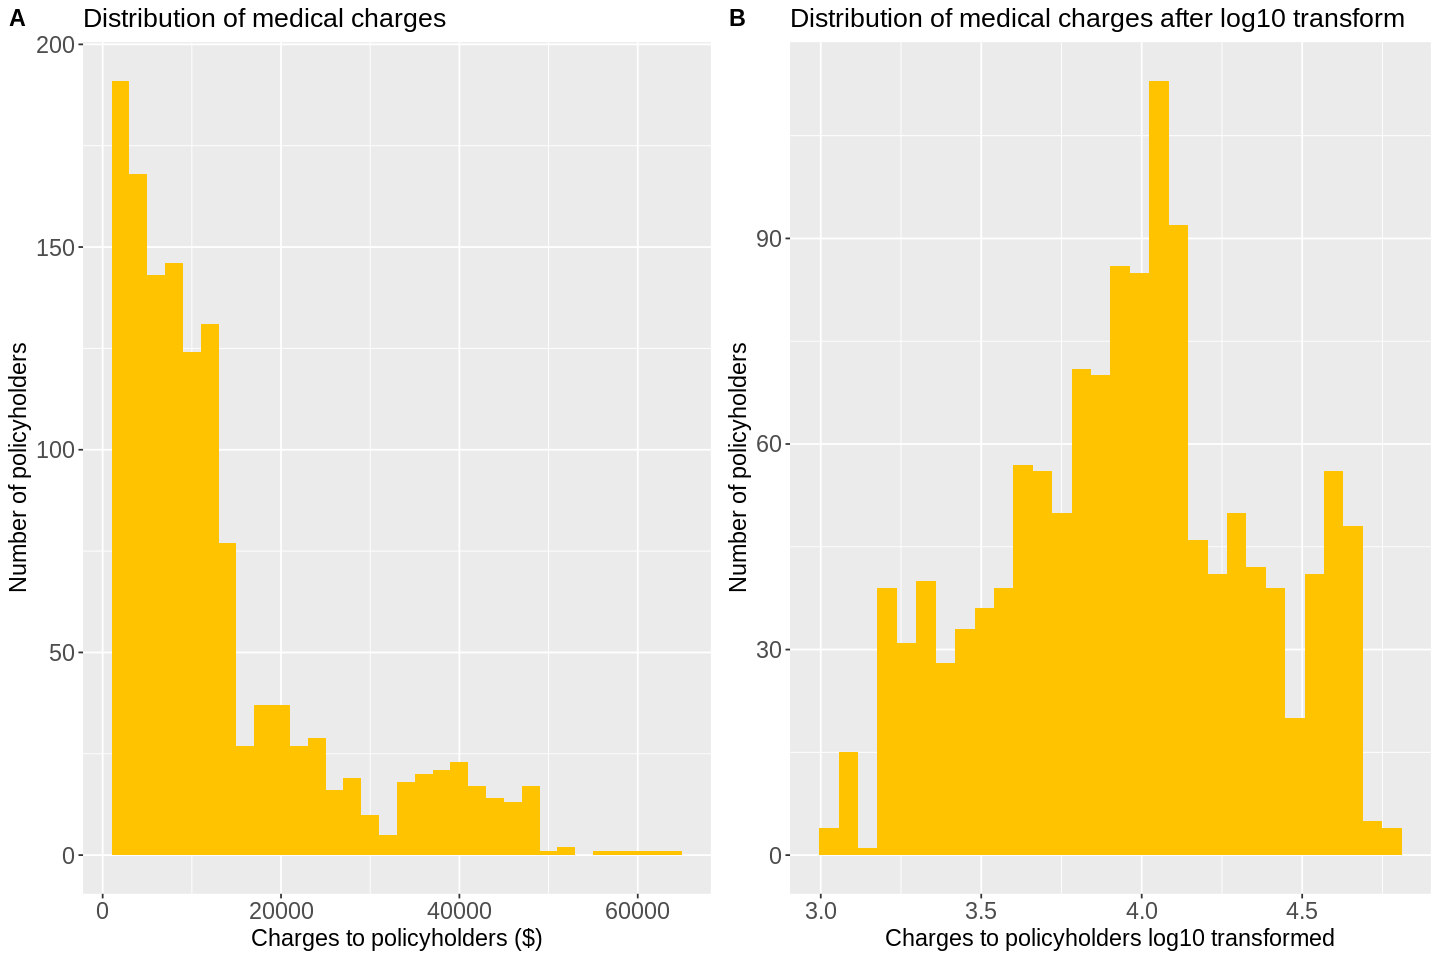

In [ ]:
charges_hist <- df %>%
    ggplot(
        aes(x=charges)
        ) +
    geom_histogram(
        binwidth = 2000,
        show.legend = FALSE,
        fill = "#FFC300"
        )+
    labs(
        x = "Charges to policyholders ($)",
        y = "Number of policyholders",
        title = "Distribution of medical charges"
        )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

charges_hist_log10 <- df %>%
    ggplot(
        aes(x=log10(charges))
        ) +
    geom_histogram(
        show.legend = FALSE,
        fill = "#FFC300"
        )+
    labs(
        x = "Charges to policyholders log10 transformed",
        y = "Number of policyholders",
        title = "Distribution of medical charges after log10 transform"
        )+
    # resize text
    theme(
        plot.title = element_text(size=16),
        axis.text = element_text(size=14),
        axis.title = element_text(size=14)
    )

cowplot::plot_grid(
    charges_hist, charges_hist_log10,
    labels="AUTO",
    ncol = 2,
    nrow = 1
    )

In [ ]:
# log10 transform of response variable 
df$logCharges<- log10(df$charges)

# Split the data into training and test sets
set.seed(122)                    # Set the seed to make the partition reproducible
training.samples <- df$logCharges %>%
  createDataPartition(p = 0.8, list = FALSE)  
train  <- df[training.samples, ]
test <- df[-training.samples, ]

In [ ]:
# Train the model on the training dataset
formula <- as.formula("logCharges ~ smoker + bmi + age + children + sex + region")

model <- lm(formula, data = train)

summary(model)


Call:
lm(formula = formula, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40628 -0.09013 -0.02321  0.03314  0.93626 

Coefficients:
                  Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      3.0308795  0.0342260  88.555 < 0.0000000000000002 ***
smokeryes        0.6760329  0.0144515  46.779 < 0.0000000000000002 ***
bmi              0.0058070  0.0009931   5.848  0.00000000663898698 ***
age              0.0153611  0.0004142  37.090 < 0.0000000000000002 ***
children1        0.0538452  0.0146927   3.665             0.000260 ***
children2        0.1286999  0.0161328   7.978  0.00000000000000385 ***
children3        0.1086741  0.0189414   5.737  0.00000001254227630 ***
children4        0.2109837  0.0411729   5.124  0.00000035470555674 ***
children5        0.1835554  0.0552900   3.320             0.000931 ***
sexmale         -0.0304837  0.0115905  -2.630             0.008661 ** 
regionnorthwest -0.0305449  0.0164321  -1.859            

In [ ]:
# Make predictions on the training dataset
predictions <- model %>% predict(train)
# Model performance
# (a) Calculating the residuals
residuals <- train$logCharges - predictions
# (b) Calculating Root Mean Squared Error
rmse <- sqrt(mean(residuals^2))

rmse %>%
    round(digits=3)

[1] 0.187

In [ ]:
# Make predictions on the testing dataset
predictions <- model %>% predict(test)
# Model performance
# (a) Calculating the residuals
residuals <- test$logCharges - predictions
# (b) Calculating Root Mean Squared Error
rmse <- sqrt(mean(residuals^2))

rmse %>%
    round(digits=3)

[1] 0.208